# 7 Nov 23 - Activity: The Fast Fourier Transform

We have shown how to decompose a signal using a Fourier series decomposition:

$$V(t) = \sum_{n=-\infty}^{\infty} c_n e^{i n \omega t}$$

where we find the Fourier coefficients $c_n$ by integrating over the period of the signal (performing a Fourier transform of the signal):

$$c_n = \frac{1}{T} \int_0^T V(t) e^{-i n \omega t} dt$$

## Extracting the Fourier coefficients

We wrote some code earlier to perform the Fourier transform of a signal and obtain the coefficients. We will see how to do that using the `scipy` library later, but let's produce these results first without it. We are going to prepare several test signals, but you will need to make more.

### Test Signals

The test signals we are going to use are:

* A sine wave with frequency 10 Hz and amplitude 1 V: $V(t) = A\sin(2 \pi f t)$
* A sum of 3 in-phase sine waves with frequencies 10 Hz, 15 Hz, and 30Hz, with amplitudes, 3V, 2V, and 1V respectively: $V(t) = A_1 \sin(2 \pi f_1 t) + A_2 \sin(2 \pi f_2 t) + A_3 \sin(2 \pi f_3 t)$
* Both of these signals with random noise added to them.

Below we import the libraries we need and define the functions we will use to generate the signals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Define the functions to create signals
def simple_signal(t, A=1, f=1):
    """Creates a simple sinusoidal signal."""
    return A*np.sin(2 * np.pi * f* t)

def summed_signal(t, A, f):
    """Creates a more complex signal with multiple frequencies."""
    return A[0] * np.sin(2 * np.pi * f[0]*t) + A[1] * np.sin(2 * np.pi * f[1]*t/T0) + A[2]*np.sin(2 * np.pi * f[2]*t)

def noisy_signal(t, A=1, f=1, B=1):
    """Creates a simple signal with random noise."""
    random.seed(42) # seed keeps the random numbers the same each time
    noise = B*np.random.normal(0, 1, len(t)) 
    return simple_signal(t, A, f) + noise

def noisy_summed_signal(t, A, f, B=1):
    """Creates a simple signal with random noise."""
    random.seed(42) # seed keeps the random numbers the same each time
    noise = B*np.random.normal(0, 1, len(t))
    return summed_signal(t, A, f) + noise

Let's create those signals and plot them.

In [3]:
# Set the sample rate and time
dt = 0.0005  # Sampling frequency
T0 = 0.1 # Signal period
T = 3.0*T0  # Sample time length
t = np.arange(0, T, dt)  # Time points

fsimple = 10
Asimple = 1

f = np.array([10, 15, 30])
A = np.array([3, 2, 1])

simple = simple_signal(t, Asimple, fsimple)
summed = summed_signal(t, A, f)

simple_noise = 0.1
summed_noise = 0.8

noisy = noisy_signal(t, Asimple, fsimple, simple_noise)
noisy_summed = noisy_summed_signal(t, A, f, summed_noise)

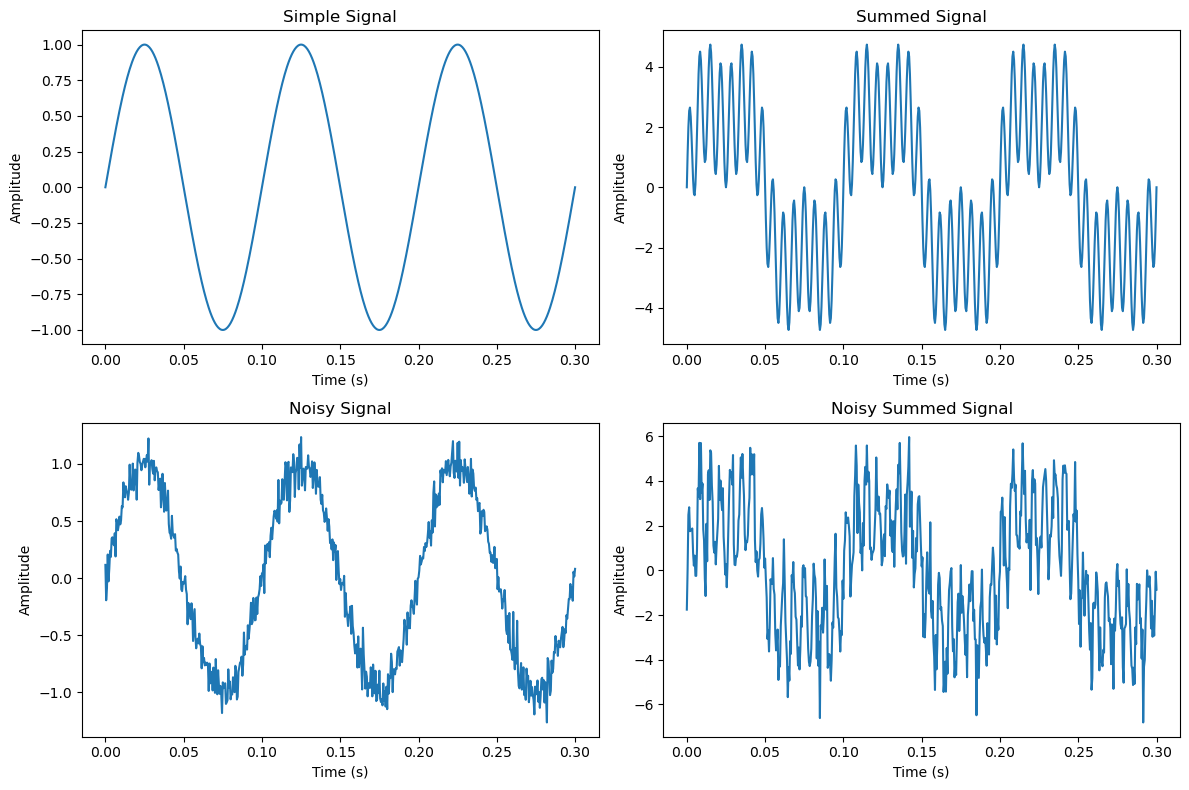

In [4]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t, simple)
plt.title('Simple Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, summed)
plt.title('Summed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, noisy)
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, noisy_summed)
plt.title('Noisy Summed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()

### Find the Fourier Components

**&#9989; Do this**

* Using your code from the previous activity, write a function that takes in a signal and returns the Fourier coefficients.  You may want to copy and paste your code from the previous activity.
* Plot the Fourier coefficients as a function of frequency.  You may want to copy and paste your code from the previous activity.
* What do you notice? Can you recover information about the original signal from the Fourier coefficients?
* What pitfalls could you run into? Think about the Nyquist frequency/sampling rate.



In [5]:
### Your code here